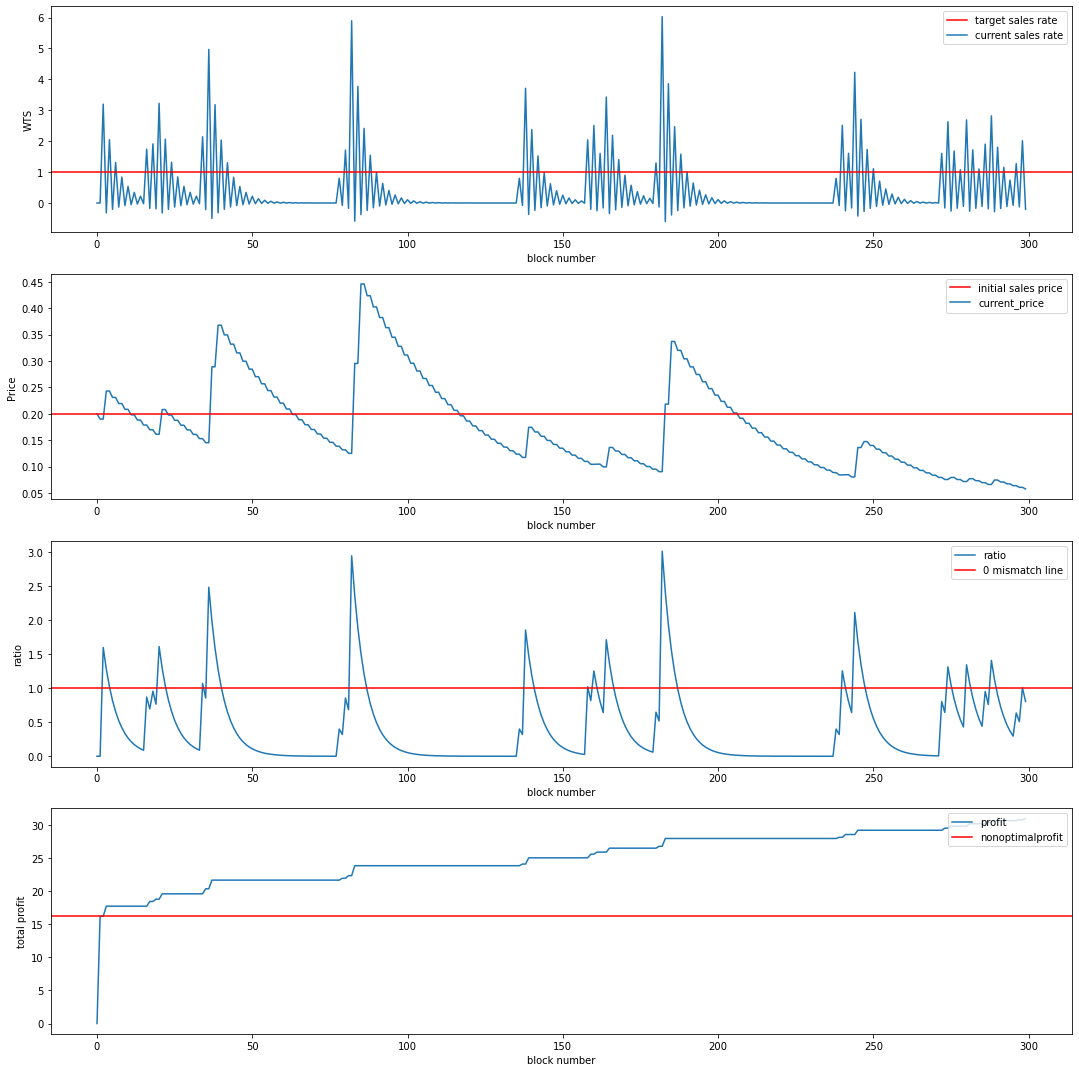

In [1]:
from Algo import *
import matplotlib.pyplot as plt
import random


class Simulator:
    customers = []
    def __init__(self, pid, simblocklength):
        self.pid = pid
        self.simblocklength = simblocklength
    
    """
    Creates 200 customers with an eth budget of 0 - 0.33
    """
    def initialize_customers(self):
        for i in range(200):
            self.customers.append(random.random() / 3)

    """
    Simulates sales and the algorithm model
    """
    def initialize_random_sales_blocks(self):
        self.initialize_customers()
        blocksarray = []
        wtsarray = []
        blockslist = []
        profitlist = []
        pricelist = []
        ratiolist = []
        nonoptimalprofit = 0
        totalsales = 0
        """
        This part calculates what profit would have been with a fixed mint price
        """
        for k in range(len(self.customers)):
            if (self.customers[k] >= self.pid.initial_price):
                nonoptimalprofit += self.pid.initial_price
        
        """
        Creates a new block object at each index until we reach the desired number of blocks. 
        Each one contains an index and an integer representing number of sales that occurred at the given block.
        """
        for i in range(self.simblocklength):
            blocksarray.append(block(i))
            self.pid.block_arr = blocksarray

            """
            Loops over the customers and checks to see if they can afford the mint at the current price.
            If they can, it increments totalsales and decrements the customer's balance by the current mint price.
            """
            for j in range(len(self.customers)):
                if (self.customers[j] >= self.pid.get_price()):
                    blocksarray[i].add_sales()
                    self.customers[j] -= self.pid.get_price()
                    totalsales += 1
            
            """
            Appends all the calculated values to their respective lists.
            """
            profitlist.append(self.pid.get_profit())
            wtsarray.append(self.pid.calc_wts(blocksarray[i].sales))
            pricelist.append(self.pid.get_price())
            ratiolist.append(self.pid.check_rate())
        for i in range(self.simblocklength):
            blockslist.append(blocksarray[i].index)
        return blockslist, wtsarray, pricelist, ratiolist, profitlist, nonoptimalprofit

    """
    Instantiates all the values for the plots.
    """
    def plot_sim(self, price, blocks_arr, wts, ratiolist, profitlist, nonoptimalprofit):
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15, 15))

        wts_line, = ax1.plot(blocks_arr, wts)
        target_wts_line = ax1.axhline(
            y=self.pid.goal_sales_per_block, color='r')

        ax1.set_xlabel("block number")
        ax1.set_ylabel("WTS")

        ax1.legend([target_wts_line, wts_line], [
                   'target sales rate', 'current sales rate'], loc='upper right')

        price_line, = ax2.plot(blocks_arr, price)
        initial_price_line = ax2.axhline(y=self.pid.initial_price, color='r')

        ax2.set_xlabel("block number")
        ax2.set_ylabel("Price")

        ax2.legend([initial_price_line, price_line], [
                   'initial sales price', 'current_price'], loc='upper right')

        ratio_line, = ax3.plot(blocks_arr, ratiolist)
        one_line = ax3.axhline(y = 1.0, color='r')
        ax3.set_xlabel("block number")
        ax3.set_ylabel("ratio")
        ax3.legend([ratio_line, one_line], ["ratio", "0 mismatch line"], loc='upper right')

        profit_line, = ax4.plot(blocks_arr, profitlist)
        nonoptimalprofit_line = ax4.axhline(y = nonoptimalprofit, color='r')
        ax4.set_xlabel("block number")
        ax4.set_ylabel("total profit")
        ax4.legend([profit_line, nonoptimalprofit_line], ["profit", 'nonoptimalprofit'], loc='upper right')
        fig.tight_layout()
        plt.show()

    """
    Plots the simulations.
    """
    def plot_simulation(self):
        self.pid.reset()
        blocks_arr, wts_array, pricelist, ratiolist, profitlist, nonoptimalprofit = self.initialize_random_sales_blocks()
        self.plot_sim(pricelist, blocks_arr, wts_array, ratiolist, profitlist, nonoptimalprofit)

algo = AlgoClass(1, 0.2, 2)
simulation = Simulator(algo, 300)
simulation.plot_simulation()


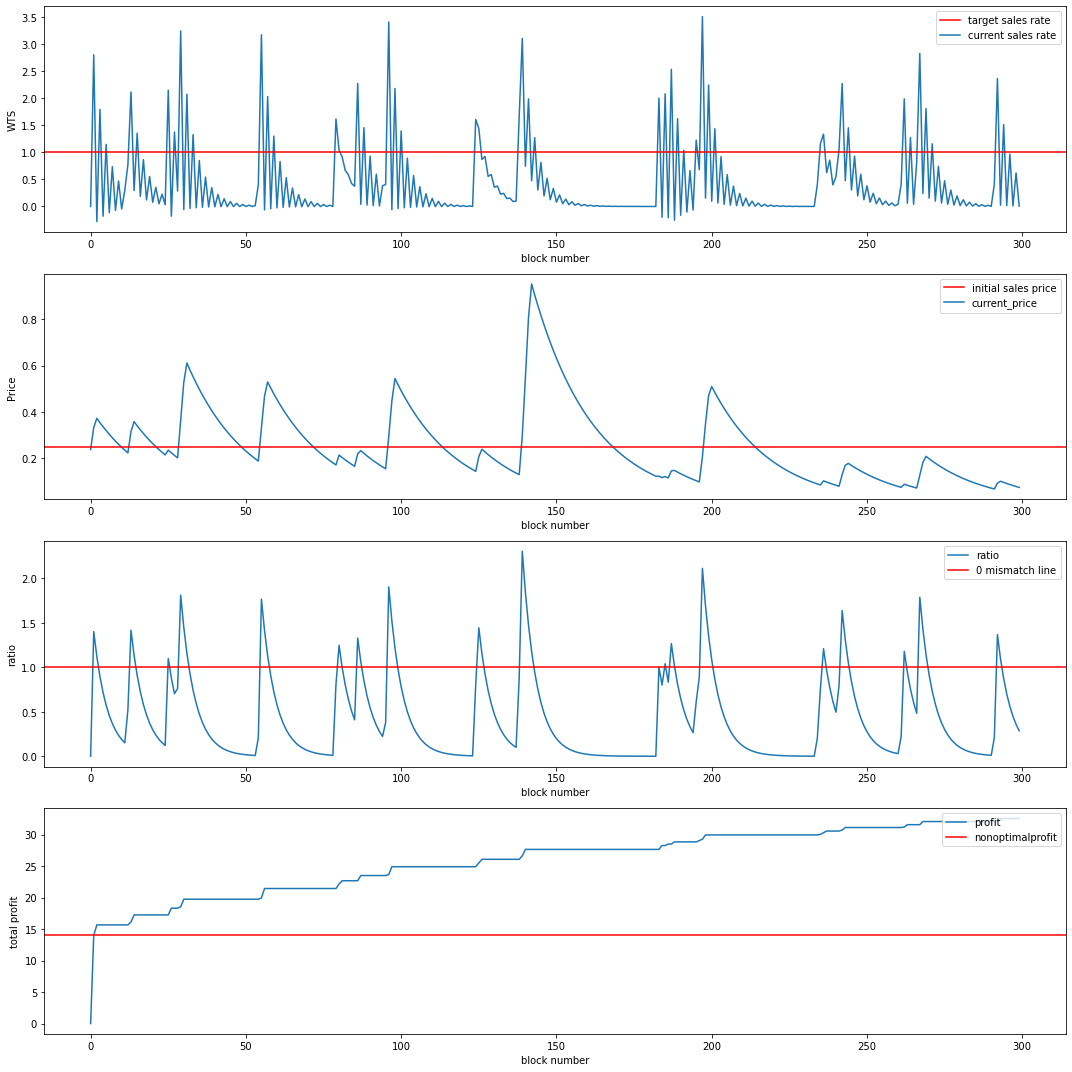

In [2]:
algo2 = AlgoClass(1, 0.25, 1)
simulation2 = Simulator(algo2, 300)
simulation2.plot_simulation()